# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data 


Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [202]:
import numpy as np
import pandas as pd
from typing import  List
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

In [203]:
data = pd.read_csv('/Users/slitasov/Downloads/nlp-getting-started/train.csv')

In [204]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [205]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [206]:
data.isnull()

,id,keyword,location,text,target
0,False,True,True,False,False
1,False,True,True,False,False
2,False,True,True,False,False
3,False,True,True,False,False
4,False,True,True,False,False
...,...,...,...,...,...
7608,False,True,True,False,False
7609,False,True,True,False,False
7610,False,True,True,False,False
7611,False,True,True,False,False


In [207]:
data.fillna(value = '')

,id,keyword,location,text,target
0,1,,,Our Deeds are the Reason of this #earthquake M...,1
1,4,,,Forest fire near La Ronge Sask. Canada,1
2,5,,,All residents asked to 'shelter in place' are ...,1
3,6,,,"13,000 people receive #wildfires evacuation or...",1
4,7,,,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,,,Two giant cranes holding a bridge collapse int...,1
7609,10870,,,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,,,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,,,Police investigating after an e-bike collided ...,1


## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?


In [208]:
class_distribution = data['target'].value_counts()
print(class_distribution)

0    4342
1    3271
Name: target, dtype: int64


2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

In [209]:
top_10_keywords = data['keyword'].value_counts().head(10)
filtered_data = data[data['keyword'].isin(top_10_keywords.index)]
keyword_class_counts = filtered_data.groupby(['keyword', 'target']).size().unstack()
keyword_class_counts

target,0,1
keyword,,
armageddon,37,5
body%20bags,40,1
damage,22,19
deluge,36,6
evacuate,15,25
fatalities,19,26
fear,35,5
harm,37,4
outbreak,1,39


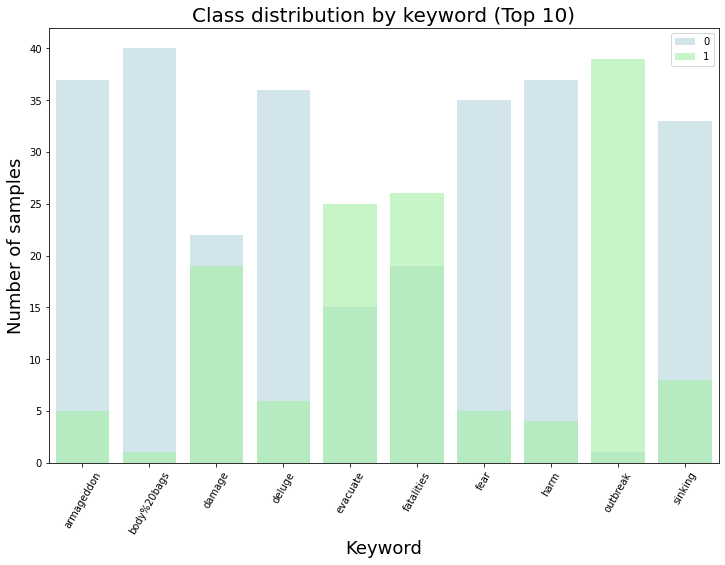

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

sns.barplot(x=keyword_class_counts.index,y=keyword_class_counts[0], color='lightblue', alpha=0.6, label='0')
sns.barplot(x=keyword_class_counts.index, y=keyword_class_counts[1], color='palegreen', alpha=0.6, label='1')

plt.xlabel('Keyword', fontsize = 18)
plt.ylabel('Number of samples', fontsize = 18)
plt.title('Class distribution by keyword (Top 10)', fontsize = 20)
plt.xticks(rotation=60)
plt.legend()

plt.show()


**Выводы**:
- Среди самых популярных keywords можно выделить следующие закономерности: 

1) Слова "armageddon, body%20bags, deluge, fear, harm, sinking" чаще всего используются людьми в обычных твитах и имеют низкую взаимосвязь к реальными катастрофами

2) Слова "damage, evacuate, fatalities, outbreak" чаще используются при твитах о реальных катастрофах

## Задание 3 (0.5 балла) 

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [211]:
train.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1
7122,10203,violent%20storm,NaN,If you were the NWS wth a rotating storm w/ a ...,1
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0


In [212]:
train_new = train.copy()

train_new['combined_text'] = train_new[['keyword', 'location', 'text']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

In [213]:
train_new.reset_index(drop = True)

,id,keyword,location,text,target,combined_text
0,1707,bridge%20collapse,NaN,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,bridge%20collapse nan Ashes 2015: AustraliaÛª...
1,5789,hail,"Carol Stream, Illinois",GREAT MICHIGAN TECHNIQUE CAMP\nB1G THANKS TO @...,1,"hail Carol Stream, Illinois GREAT MICHIGAN TEC..."
2,7789,police,Houston,CNN: Tennessee movie theater shooting suspect ...,1,police Houston CNN: Tennessee movie theater s...
3,8257,rioting,NaN,Still rioting in a couple of hours left until ...,1,rioting nan Still rioting in a couple of hours...
4,10656,wounds,Lake Highlands,Crack in the path where I wiped out this morni...,0,wounds Lake Highlands Crack in the path where ...
...,...,...,...,...,...,...
5324,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0,obliteration Merica! @Eganator2000 There aren'...
5325,7691,panic,NaN,just had a panic attack bc I don't have enough...,0,panic nan just had a panic attack bc I don't h...
5326,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0,blood nan Omron HEM-712C Automatic Blood Press...
5327,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1,nan nan Officials say a quarantine is in place...


In [214]:
train_new.loc[[6590, 7122, 2769]]

,id,keyword,location,text,target,combined_text
6590,9436,survivors,"Marietta, GA",Stemming from my #Cubs talk- the team rosters ...,1,"survivors Marietta, GA Stemming from my #Cubs ..."
7122,10203,violent%20storm,NaN,If you were the NWS wth a rotating storm w/ a ...,1,violent%20storm nan If you were the NWS wth a ...
2769,3980,devastation,Atlanta g.a.,http://t.co/Gxgm1T3W0J From Devastation to Ela...,0,devastation Atlanta g.a. http://t.co/Gxgm1T3W0...


## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [215]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

feature_matrix = vectorizer.fit_transform(train_new['combined_text'])

matrix_size = feature_matrix.shape
print(matrix_size)


(5329, 18456)


## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось? 

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [216]:
vectorizer.vocabulary_

{'bridge': 2948,
 '20collapse': 320,
 'nan': 11140,
 'ashes': 1928,
 '2015': 295,
 'australia': 2059,
 'ûªs': 18426,
 'collapse': 3914,
 'at': 1977,
 'trent': 16484,
 'among': 1628,
 'worst': 17814,
 'in': 8314,
 'history': 7773,
 'england': 5722,
 'bundled': 3085,
 'out': 11996,
 'for': 6503,
 '60': 755,
 'http': 7970,
 'co': 3861,
 't5trhjuau0': 15734,
 'hail': 7420,
 'carol': 3363,
 'stream': 15420,
 'illinois': 8249,
 'great': 7206,
 'michigan': 10594,
 'technique': 15889,
 'camp': 3261,
 'b1g': 2147,
 'thanks': 16014,
 'to': 16273,
 'bmurph1019': 2753,
 'hail_youtsey': 7421,
 'termn8r13': 15950,
 'goblue': 7088,
 'wrestleon': 17849,
 'oaskgki6qj': 11649,
 'police': 12635,
 'houston': 7933,
 'cnn': 3854,
 'tennessee': 15933,
 'movie': 10940,
 'theater': 16026,
 'shooting': 14648,
 'suspect': 15633,
 'killed': 9246,
 'by': 3150,
 'di8elzswnr': 4890,
 'rioting': 13801,
 'still': 15358,
 'couple': 4204,
 'of': 11709,
 'hours': 7925,
 'left': 9644,
 'until': 16885,
 'have': 7546,
 'be'

In [217]:
def contains_digit(s: str) -> bool:
    # Проверка, содержит ли слово цифры
    return any(symb.isdigit() for symb in s)

def contains_punctuation(s: str) -> bool:
    # Проверка, содержит ли слово пунктуацию
    return any(symb for symb in s if symb.isalnum() is False)

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s.startswith("#")

def is_mention(s: str) -> bool:
    # Проверка, является ли слово упоминанием
    return s.startswith("@")

def investigate_vocabulary(vocabulary):
    with_digit = 0
    with_punctuation = 0
    hashtags = 0
    mentions = 0
    
    for s in vocabulary:
        if contains_digit(s) == True:
            with_digit += 1
        if contains_punctuation(s) == True:
            with_punctuation += 1
        if is_hashtag(s) == True:
            hashtags += 1
        if is_mention(s) == True:
            mentions += 1
    
    print('With digit:      ', with_digit)
    print('With punctuation:', with_punctuation)
    print('Hashtags:        ', hashtags)
    print('Mentions:        ', mentions)





In [218]:
dummy_vocab = {'th1nk' : 0,
               'think333' : 1,
               'think.' : 2,
               'th!nk' : 3,
               'th...nk' : 4,
               '#think' : 5,
               '@think' : 6,
               '@thinking':7,
               '@nothink' : 8,
               'think' : 9}
investigate_vocabulary(dummy_vocab)

With digit:       2
With punctuation: 7
Hashtags:         1
Mentions:         3


In [219]:
investigate_vocabulary(vectorizer.vocabulary_
                       )

With digit:       3812
With punctuation: 315
Hashtags:         0
Mentions:         0


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [220]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer

In [221]:
help(TweetTokenizer)

Help on class TweetTokenizer in module nltk.tokenize.casual:

class TweetTokenizer(nltk.tokenize.api.TokenizerI)
 |  TweetTokenizer(preserve_case=True, reduce_len=False, strip_handles=False, match_phone_numbers=True)
 |  
 |  Tokenizer for tweets.
 |  
 |      >>> from nltk.tokenize import TweetTokenizer
 |      >>> tknzr = TweetTokenizer()
 |      >>> s0 = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
 |      >>> tknzr.tokenize(s0)
 |      ['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3'
 |      , 'and', 'some', 'arrows', '<', '>', '->', '<--']
 |  
 |  Examples using `strip_handles` and `reduce_len parameters`:
 |  
 |      >>> tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
 |      >>> s1 = '@remy: This is waaaaayyyy too much for you!!!!!!'
 |      >>> tknzr.tokenize(s1)
 |      [':', 'This', 'is', 'waaayyy', 'too', 'much', 'for', 'you', '!', '!', '!']
 |  
 |  Method resolution order:
 |      TweetTokenizer
 |      nltk.toke

In [222]:
tknzr = TweetTokenizer()
vectorizer = CountVectorizer(tokenizer=tknzr.tokenize)
feature_matrix = vectorizer.fit_transform(train_new['combined_text'])


In [223]:
investigate_vocabulary(vectorizer.vocabulary_
                       )

With digit:       3939
With punctuation: 7355
Hashtags:         1470
Mentions:         1679


**Сравнение:** C помощью tweettokenizer нам удалось найти хештеги и упоминания в тексте, которые не удалось найти без него

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно: 

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer



In [224]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
import re

In [225]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/slitasov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [226]:
def contains_only_latin_letters(s: str) -> bool:
    # Проверка, содержит ли слово только латинские буквы
    return re.match(r'^[a-zA-Z]+$', s)

def is_emoji(s: str) -> bool:
    # Текстовые патерны, удовлетворяющие критериям эмодзи
    punctuation =  r"^[!\"#$%&'*+,\-./:;<=>?@[\]^_`{|}~]*$"
    
    # Проверка
    boll = True
    if re.match(punctuation, s) and ('(' in s or ')' in s):
        boll = False
        
    return boll 

def is_hashtag(s: str) -> bool:
    # Проверка, является ли слово хэштегом
    return s.startswith("#")

def custom_tokenizer(s: str) -> List[str]:    
    # Кастомный токенайзер
    
    # Приведение к нижнему регистру
    s = s.lower()
    
    # Токенизация
    tokens = tknzr.tokenize(s)
    
    # Удаление токенов, содержащих не латинские буквы и хэштегов с латинскими буквами
    filtered_tokens = []
    for token in tokens:
        if contains_only_latin_letters(token) or is_emoji(token) or is_hashtag(token):
            filtered_tokens.append(token)

    # Удаление стоп-слов
    stop_words = set(stopwords.words('english'))
    index = 0
    while index < len(filtered_tokens):
        token = filtered_tokens[index]
        if token in stop_words:
            filtered_tokens.pop(index)
        else:
            index += 1

            
    # Стемиинг 
    stemmer = SnowballStemmer('english')
    stemmed_tokens = []
    for token in filtered_tokens:
        stemmed_token = stemmer.stem(token)
        stemmed_tokens.append(stemmed_token)
    tokens = stemmed_tokens

    return tokens

In [227]:
custom_tokenizer('She LOVES painting :-) #art')

['love', 'paint', ':-)', '#art']

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [228]:
text = train['text'].to_list()

for i in range(10):
    print(i+1, custom_tokenizer(text[i]))

1 ['ash', '2015', ':', 'australia', '\x89', 'ûªs', 'collaps', 'trent', 'bridg', 'among', 'worst', 'histori', ':', 'england', 'bundl', 'australia', '60', '...', 'http://t.co/t5trhjuau0']
2 ['great', 'michigan', 'techniqu', 'camp', 'b1g', 'thank', '@bmurph1019', '@hail_youtsey', '.', '@termn8r13', '#goblu', '#wrestleon', 'http://t.co/oaskgki6qj']
3 ['cnn', ':', 'tennesse', 'movi', 'theater', 'shoot', 'suspect', 'kill', 'polic', 'http://t.co/di8elzswnr']
4 ['still', 'riot', 'coupl', 'hour', 'left', 'class', '.']
5 ['crack', 'path', 'wipe', 'morn', 'beach', 'run', '.', 'surfac', 'wound', 'left', 'elbow', 'right', 'knee', '.', 'http://t.co/yaqrsximph']
6 ['expert', 'franc', 'begin', 'examin', 'airplan', 'debri', 'found', 'reunion', 'island', ':', 'french', 'air', 'accid', 'expert', '...', 'http://t.co/tagzbcxfj0', '#mlb']
7 ["'", 'came', 'kill', 'indian', '...', 'fun', "'", ':', 'video', 'smirk', 'remorseless', 'pakistani', 'killer', 'show', 'boast', '.', 'http://t.co/fpjlwoxklg']
8 ['@john

## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.


In [229]:
X_train = train['text']
y_train = train['target']
X_test = test['text']
y_test = test['target']

In [230]:
vectorizer = CountVectorizer(tokenizer = custom_tokenizer)

vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.transform(X_test)

2. Обучите LogisticRegression на полученных признаках.


In [231]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=500)

model.fit(vectorized_train, y_train)

LogisticRegression(max_iter=500)

3. Посчитайте метрику f1-score на тестовых данных.

In [232]:
from sklearn.metrics import f1_score

y_pred = model.predict(vectorized_test)

f1 = f1_score(y_test, y_pred)

print(f1)

0.7468423942888521


## Задание 9 (1 балл)

1. Повторите 8 задание, но с tf-idf векторизатором. Как изменилось качество?


In [233]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer)

vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.transform(X_test)


In [234]:
model = LogisticRegression(max_iter=500)

model.fit(vectorized_train, y_train)

LogisticRegression(max_iter=500)

In [188]:
y_pred = model.predict(vectorized_test)

f1 = f1_score(y_test, y_pred)

print(f1)

0.748740906547286


In [189]:
vectorized_train = feature_matrix.shape
vectorized_train

(5329, 19671)

1. **Ответ:** Качество немного улучшилось

2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?


In [200]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, max_df=0.9)
vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.transform(X_test)
model = LogisticRegression(max_iter=500)

model.fit(vectorized_train, y_train)

y_pred = model.predict(vectorized_test)
f1 = f1_score(y_test, y_pred)

print(f1)

0.748740906547286


In [201]:
vectorized_train.shape

(5329, 15511)

2. **Ответ:** Метрика f1 не поменялась, но количество слов уменьшилось

3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества? 

In [240]:
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, min_df = 0.0005, max_df=0.9)
vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.transform(X_test)
model = LogisticRegression(max_iter=500)

model.fit(vectorized_train, y_train)

y_pred = model.predict(vectorized_test)
f1 = f1_score(y_test, y_pred)

print(f1)

0.7511210762331839


3. **Ответ:** Да, удалось увеличить f1 score до around 0.75

## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 8 с HashingVectorizer, укажите количество фичей равное 5000.


In [246]:
from sklearn.feature_extraction.text import HashingVectorizer

vectorizer = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
vectorized_train = vectorizer.fit_transform(X_train)
vectorized_test = vectorizer.transform(X_test)

model = LogisticRegression(max_iter=500)
model.fit(vectorized_train, y_train)

y_pred = model.predict(vectorized_test)
f1 = f1_score(y_test, y_pred)

print(f1)


/Users/slitasov/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.7105263157894737


2. Какой из подходов показал самый высокий результат?

2. **Ответ:** Лучше всего показал себя подход с использованием TD-IDF vectorizer с минимальным ограничением min_df = 0.005 и max_df = 0.9

## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.

**Ответ:** Условие выполнено в пункте 9.3